In [1]:
import numpy as np
import pandas as pd
import iisignature
from esig import tosig as esig
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from tools import brownian
from transformers import AddTime, LeadLag

# Example 1

$$X_t = 0.2X_{t-1} + \epsilon_1$$
$$Y_t = -0.5 + \exp\{-(X_{t-1} + X_{t-2})^2\} + 0.1\epsilon_2$$

where $\epsilon_i \sim N(0,1), i=1,2$.

In [105]:
length = 100
total_obs = 100

In [106]:
# generate paths
paths = []
for n in range(total_obs):
    X, Y = np.ones((length,1)), np.ones((length,1))
    X[1:] = [0.2*x + np.random.rand() for x in X[:-1]]
    Y[1] = -0.5 + np.exp(-X[0]**2) + 0.1*np.random.rand()
    Y[2:] = [-0.5 + np.exp(-(x1+x2)**2) + 0.1*np.random.rand() for x1,x2 in zip(X[1:-1],X[:-2])]
    paths.append(np.concatenate((X,Y), 1))

In [107]:
# compute signatures level 2
depth = 2
# sigs = [iisignature.sig(p,depth,2) for p in paths]
sigs = [np.array([esig.stream2logsig(p[:i],depth) for i in range(length)]) for p in paths]

In [108]:
expected_sig = sigs[0]
for s in sigs[1:]:
    expected_sig += s
expected_sig /= total_obs

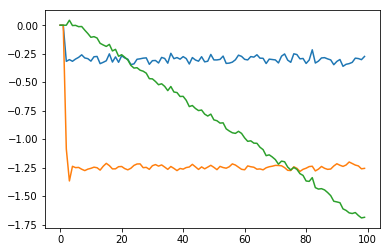

In [109]:
plt.plot(expected_sig)
plt.show()

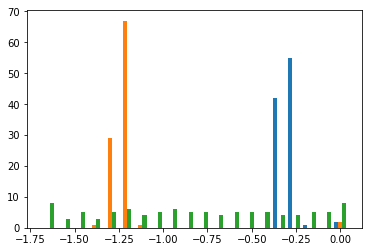

In [110]:
plt.hist(expected_sig, bins=20)
plt.show()

# Example 2

$$X_t = -0.5X_{t-1} + 0.4\epsilon_1$$
$$Y_t = -0.5Y_{t-1} + X_{t-1}^2 + 0.4\epsilon_2$$


where $\epsilon_i \sim N(0,1), i=1,2$.

In [111]:
# generate paths
paths = []
for n in range(total_obs):
    X, Y = np.zeros((length,1)), np.zeros((length,1))
    X[1:] = [-0.5*x + 0.4*np.random.rand() for x in X[:-1]]
    Y[1:] = [-0.5*y + x**2 + 0.4*np.random.rand() for x,y in zip(X[:-1],Y[:-1])]
    paths.append(np.concatenate((X,Y),1))

In [112]:
# compute signatures level 2
depth = 2
# sigs = [iisignature.sig(p,depth,2) for p in paths]
sigs = [np.array([esig.stream2logsig(p[:i],depth) for i in range(length)]) for p in paths]

In [113]:
expected_sig = sigs[0]
for s in sigs[1:]:
    expected_sig += s
expected_sig /= total_obs

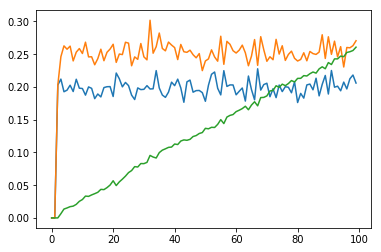

In [114]:
plt.plot(expected_sig)
plt.show()

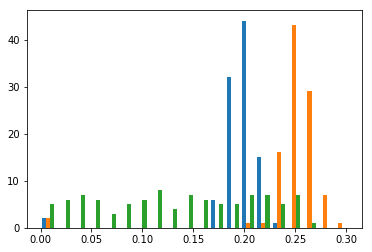

In [115]:
plt.hist(expected_sig, bins=20)
plt.show()

In [23]:
# correct = 0
# incorrect = 0
# neutral = 0

# areas = []

# for s in sigs:
#     increment_x, increment_y, area_xy = s
#     areas.append(area_xy)
    
#     rule_xy_1 = (increment_x>0.) and (increment_y>0.) and (area_xy>0.)
#     rule_xy_2 = (increment_x>0.) and (increment_y<0.) and (area_xy<0.)
#     rule_xy_3 = (increment_x<0.) and (increment_y<0.) and (area_xy>0.)
#     rules_xy = rule_xy_1 or rule_xy_2 or rule_xy_3
    
#     rule_yx_1 = (increment_x>0.) and (increment_y>0.) and (area_xy<0.)
#     rule_yx_2 = (increment_x<0.) and (increment_y>0.) and (area_xy>0.)
#     rule_yx_3 = (increment_x<0.) and (increment_y<0.) and (area_xy<0.)
#     rules_yx = rule_yx_1 or rule_yx_2 or rule_yx_3
        
#     if rules_yx:
#         correct += 1
#     elif rules_xy:
#         incorrect += 1
#     else:
#         neutral += 1